# Predicting Wine Quality with Regularization

## Introduction

In this data analysis project, I aim to explore feature selection techniques and the impact of regularization on a logistic regression model's performance. The dataset under examination is derived from a survey on eating habits and physical condition, with the objective of predicting whether a survey respondent is obese or not. I will employ various methods to select an optimal set of features for the model and evaluate its performance.

Data source: [UCI Machine Learning Repository - Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality)

## Methods and Objectives

My project will follow these main steps:

1. **Data Loading and Inspection**: I start by loading the dataset and performing an initial inspection to gain insights into its structure, including the available features and the target variable.

2. **Logistic Regression Model**: As a baseline, I create a logistic regression model without any regularization to establish a starting point for model performance.

3. **Feature Selection with Regularization**: I explore feature selection techniques using both L1 (Lasso) and L2 (Ridge) regularization methods. L1 regularization helps in selecting a subset of the most important features by setting some coefficients to zero, while L2 regularization controls overfitting by penalizing large coefficients.

4. **Hyperparameter Tuning**: I perform hyperparameter tuning for the regularization strength parameter, C, using GridSearchCV. This allows me to find the optimal C value that maximizes model performance.

5. **Visualizing Results**: To provide a comprehensive overview, I visualize the results of the hyperparameter tuning process by plotting the F1 score as a function of different C values. This helps me identify the optimal C value for my logistic regression model.

Throughout the project, I will examine how regularization impacts the model's performance and the selection of an optimal set of features for prediction. By comparing different regularization methods and hyperparameter tuning, I aim to identify the most effective approach for improving model accuracy and interpretability.

Let's delve into the code and explore these methods in detail.

-----

## Importing Libraries

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

## Load and inspect data

In [175]:
# Load data
df = pd.read_csv('dataset/winequality-red.csv', sep=';')

# Convert wine quality to binary classification: Good (>5) or Bad (<=5)
df['quality'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)

# Inspect dataframe
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


## Data transformation

In [176]:
# Assign y and features
y = df['quality']
features = df.drop(columns = ['quality'])

In [177]:
# Standardize features
standard_scaler_fit = StandardScaler().fit(features)
X = standard_scaler_fit.transform(features)

In [178]:
# Split data into test and train set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

## Data Analysis

### (1) Logistic Regression Classifier without Regularization

#### Fit Model

In [179]:
# Fit a logistic regression classifier without regularization
clf_no_reg = LogisticRegression(penalty = None, max_iter=1000)
clf_no_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty=None)

#### Plot Coefficients by Size

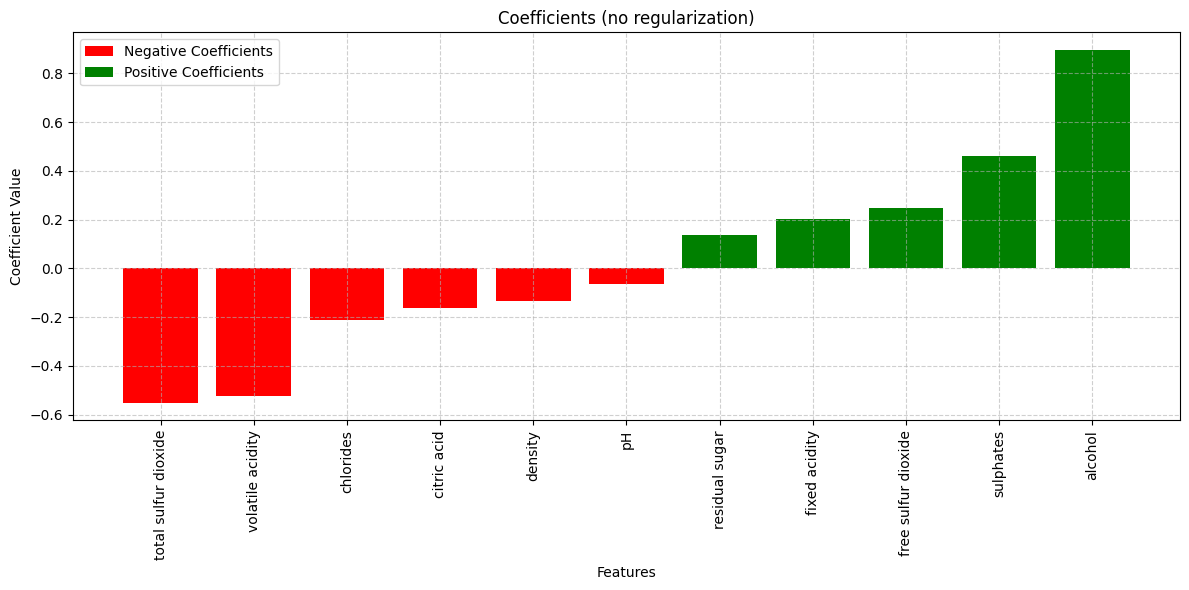

In [180]:
# Sort coefficients by size (most negative to most positive)
coefficients = clf_no_reg.coef_.ravel()
sorted_indices = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_indices]
sorted_predictors = np.array(predictors)[sorted_indices]
colors = ['g' if coef > 0 else 'r' for coef in sorted_coefficients]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_coefficients)), sorted_coefficients, color=colors)
plt.xticks(range(len(sorted_coefficients)), sorted_predictors, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients (no regularization)')
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend for positive and negative coefficients
green_patch = plt.Rectangle((0, 0), 1, 1, fc='g', label='Positive Coefficients')
red_patch = plt.Rectangle((0, 0), 1, 1, fc='r', label='Negative Coefficients')
plt.legend(handles=[red_patch, green_patch])

plt.tight_layout()
plt.show()


#### Compare performance on train to test data

In [181]:
## Training and test performance
from sklearn.metrics import f1_score
y_pred_test = clf_no_reg.predict(X_test)
y_pred_train = clf_no_reg.predict(X_train)

# Print train score rounded to three decimals
f1_train = round(f1_score(y_train, y_pred_train), 3)
print("Training score is:", f1_train)

# Print test score rounded to three decimals
f1_test = round(f1_score(y_test, y_pred_test), 3)
print("Testing Score is:", f1_test)

Training score is: 0.773
Testing Score is: 0.727


### (2) Logistic Regression with L2 (Ridge) Regularization

#### Fit Model

In [182]:
## Default Implementation (L2-regularized!)
clf_default = LogisticRegression()
clf_default.fit(X_train, y_train)

LogisticRegression()

In [183]:
## Ridge Scores
y_pred_train_ridge = clf_default.predict(X_train)
y_pred_test_ridge = clf_default.predict(X_test)

# Print train score rounded to three decimals
f1_train_ridge = round(f1_score(y_train, y_pred_train_ridge), 3)
print("Ridge-regularized F1 Training Score is:", f1_train_ridge)

# Print test score rounded to three decimals
f1_test_ridge = round(f1_score(y_test, y_pred_test_ridge), 3)
print("Ridge-regularized F1 Testing Score is:", f1_test_ridge)


Ridge-regularized F1 Training Score is: 0.773
Ridge-regularized F1 Testing Score is: 0.727


**Summary:** <br> 
The scores remain the same!  This means that the constraint boundary for the regularization we performed is large enough to hold the original loss function minimum, thus rendering our regularization ineffecitve and our model the same as the unregularized one.   
Given that C is the inverse of the regularization strength (alpha), meaning that smaller values of C correspond to more regularization and the scikit-learn default for C being 1; we need to consider values of C that are less than 1 in order to increase the amount of regularization. Next, we therefore apply a coarse-grained search before performing a fine-grained one.

#### Apply Hyperparametertuning

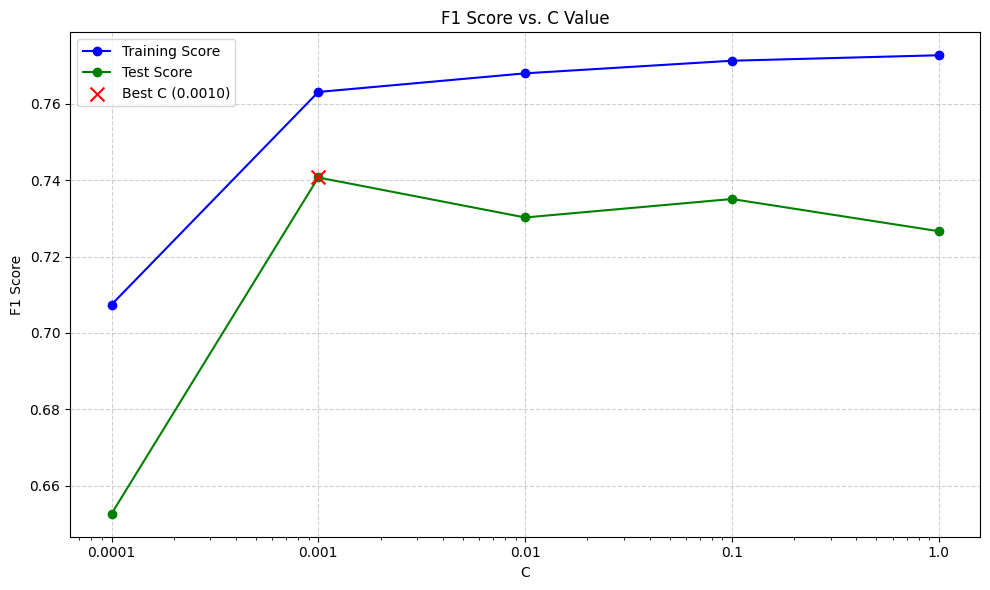

In [184]:
# Coarse-grained hyperparameter tuning
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1] # this offers a broad range of C values to try

for x in C_array:
    clf = LogisticRegression(C=x)
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    training_array.append(f1_score(y_train, y_pred_train))
    test_array.append(f1_score(y_test, y_pred_test))

# Ensure C_array has the same number of elements as training_array and test_array
C_array = np.array(C_array)

# Plot training and test scores as a function of C
plt.figure(figsize=(10, 6))
plt.plot(C_array, training_array, label='Training Score', marker='o', linestyle='-', color='b')
plt.plot(C_array, test_array, label='Test Score', marker='o', linestyle='-', color='g')

# Highlight the best C value
best_C_index = np.argmax(test_array)
best_C = C_array[best_C_index]
best_test_score = test_array[best_C_index]

plt.scatter(best_C, best_test_score, color='r', marker='x', s=100, label=f'Best C ({best_C:.4f})', zorder=5)

# Customize x-axis labels to use normal numbers
plt.xscale('log')
plt.xticks(C_array, C_array)  # Display the C values as normal numbers

plt.xlabel('C')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. C Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

**Summary:** <br>
Looking at the plot, the optimal C seems to be somewhere around 0.001 so a search window between 0.0001 and 0.01 will gives us a more fine grained window. 

#### Hyperparameter Tuning for L2 Regularization

In [185]:
# Create a parameter grid for GridSearchCV
C_array  = np.logspace(-4, -2, 100)

# Create a dict to enter as an input to param_grid
tuning_C = {'C':C_array}

# Implementing GridSearchCV with l2 penalty
clf_gs = LogisticRegression()
gs = GridSearchCV(clf_gs, param_grid = tuning_C, scoring = 'f1', cv = 5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.0001    , 0.00010476, 0.00010975, 0.00011498, 0.00012045,
       0.00012619, 0.00013219, 0.00013849, 0.00014508, 0.00015199,
       0.00015923, 0.00016681, 0.00017475, 0.00018307, 0.00019179,
       0.00020092, 0.00021049, 0.00022051, 0.00023101, 0.00024201,
       0.00025354, 0.00026561, 0.00027826, 0.00029151, 0.00030539,
       0.00031...
       0.00205651, 0.00215443, 0.00225702, 0.00236449, 0.00247708,
       0.00259502, 0.00271859, 0.00284804, 0.00298365, 0.00312572,
       0.00327455, 0.00343047, 0.00359381, 0.00376494, 0.00394421,
       0.00413201, 0.00432876, 0.00453488, 0.00475081, 0.00497702,
       0.00521401, 0.00546228, 0.00572237, 0.00599484, 0.00628029,
       0.00657933, 0.00689261, 0.00722081, 0.00756463, 0.00792483,
       0.00830218, 0.00869749, 0.00911163, 0.00954548, 0.01      ])},
             scoring='f1')

In [192]:
# Print Optimal C value rounded to three decimals
optimal_c = round(gs.best_params_['C'], 3)
print("Optimal C value is:", optimal_c)

# Print F1 score corresponding to optimal C value rounded to three decimals
f1_train_ridge_optC = round(gs.best_score_, 3)
print(f"Ridge-regularized F1 Training Score following hyperparamtertuning is: {f1_train_ridge_optC} given an optimal C value of {optimal_c}")

# Validating the "best classifier" using test data
clf_best = LogisticRegression(C = gs.best_params_['C'])
clf_best.fit(X_train, y_train)
y_pred_best = clf_best.predict(X_test)

# Print F1 score corresponding to optimal C value rounded to three decimals
f1_test_ridge_optC = f1_score(y_test,y_pred_best)
print(f"Ridge-regularized F1 Testing Score following hyperparamtertuning is: {round(f1_test_ridge_optC, 3)} given an optimal C value of {optimal_c}")

Optimal C value is: 0.002
Ridge-regularized F1 Training Score following hyperparamtertuning is: 0.772 given an optimal C value of 0.002
Ridge-regularized F1 Testing Score following hyperparamtertuning is: 0.741 given an optimal C value of 0.002


**Summary:** <br>
Using ridge regularization and hyperparametertuning we have improved the performance of our model.  
While our model performs equally well, as judged by its F1 score, on our training data (before: .773, after: .772).  
However, our model performs better (roughly by 1.4%) on the test data (before: .727, after: .741).

## (3) Feature Selection using L1 Regularization

We will no use Lasso regularization as a feature selection method:

In [188]:
## Implement L1 hyperparameter tuning with LogisticRegressionCV
C_array = np.logspace(-2,2,100)
clf_l1 = LogisticRegressionCV(Cs=C_array, cv = 5, penalty = 'l1', scoring = 'f1', solver = 'liblinear')
clf_l1.fit(X,y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                     cv=5, penalty='l1', scoring='f1', solver='liblinear')

In [189]:
# Print Best C value rounded to three decimals
best_c_value = round(clf_l1.C_[0], 3)
print('Best C value:', best_c_value)

# Print Best fit coefficients rounded to three decimals
best_coefficients = [round(coeff, 3) for coeff in clf_l1.coef_[0]]
print('Best fit coefficients:', best_coefficients)

Best C value: 0.26
Best fit coefficients: [0.116, -0.556, -0.172, 0.031, -0.173, 0.201, -0.506, 0.0, -0.071, 0.432, 0.941]


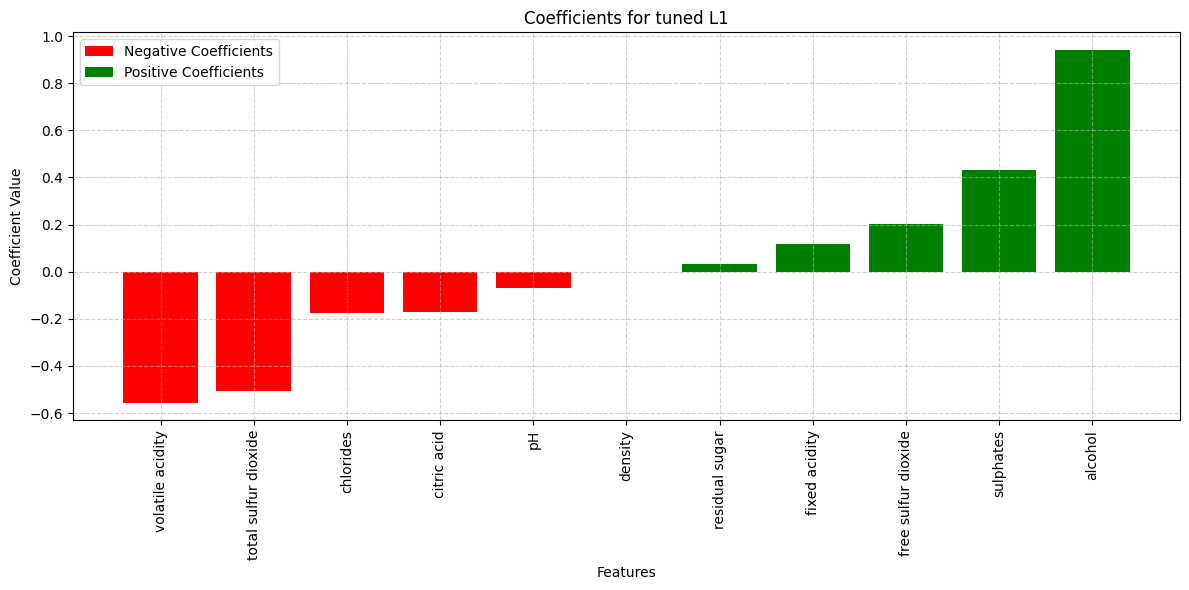

In [190]:
# Sort coefficients by size (most negative to most positive)
coefficients = clf_l1.coef_.ravel()
sorted_indices = np.argsort(coefficients)
sorted_coefficients = coefficients[sorted_indices]
sorted_predictors = np.array(predictors)[sorted_indices]
colors = ['g' if coef > 0 else 'r' for coef in sorted_coefficients]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_coefficients)), sorted_coefficients, color=colors)
plt.xticks(range(len(sorted_coefficients)), sorted_predictors, rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients for tuned L1')
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend for positive and negative coefficients
green_patch = plt.Rectangle((0, 0), 1, 1, fc='g', label='Positive Coefficients')
red_patch = plt.Rectangle((0, 0), 1, 1, fc='r', label='Negative Coefficients')
plt.legend(handles=[red_patch, green_patch])

plt.tight_layout()
plt.show()


**Summary:** <br>
Our L1 classifier has set one of the coefficients to zero, namely "density", thereby suggesting that we can effectively eliminate one feature from our model, thereby decreasing risk of overfitting.